<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>O que é o Colaboratory?</h1>

O Colaboratory ou "Colab" permite escrever código Python no seu navegador, com: 
- Nenhuma configuração necessária
- Acesso gratuito a GPUs
- Compartilhamento fácil

Você pode ser um <strong>estudante</strong>, um <strong>cientista de dados</strong> ou um <strong>pesquisador de IA</strong>, o Colab pode facilitar seu trabalho. Assista ao vídeo <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introdução ao Colab</a> para saber mais ou simplesmente comece a usá-lo abaixo!

# Implementando classificador de texto em python

In [ ]:
#imports 

import numpy as np
from sklearn.datasets import fetch_20newsgroups  #dataset de teste
from sklearn.feature_extraction.text import TfidfVectorizer #letra -> pontuação de frequencia 
from sklearn.feature_extraction.text import TfidfVectorizer #classificador linear padrão SVM
from sklearn.neural_network import MLPClassifier #rede neural multicamadas
from sklearn import metrics #modelos de metricas
from sklearn.metrics import confusion_matrix  #quantas classificações
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#diminuindo categorias
categories = ['talk.politics.misc', 'rec.autos'] # duas categorias, carros e politicas
#subset -> indicador, shuffle -> emparalha os dados, random_state -> o quao baralhado estar
twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)

In [ ]:
#dados de treino
vectorizer = TfidfVectorizer()
#utilizando o tf-idf
X_train_tfidf_vectorize = vectorizer.fit_transform(twenty_train.data)

In [ ]:
#treinando classificador
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70, ), random_state=1, verbose=True)
clf.fit(X_train_tfidf_vectorize, twenty_train.target) #passa os dados e seus rotulos 

#avaliar a perfomace
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data

vect_transform = vectorizer.transform(docs_test) #transforma em numero
predicted = clf.predict(vect_transform) #precição em cima dos numeros 

#relatorio da performase
print(metrics.classification_report(twenty_test.target, predicted,target_names=twenty_test.target_names))
print(clf.classes_) #ordem das classes

"""
 a matriz de confução serve para intepretar o relatorio sendo, as linhas as classes que se pretendem obter
 e as colunas as classes que de fato foram alcançadas
 """
confusion_matrix = confusion_matrix(twenty_test.target, predicted)
print(confusion_matrix)

                    precision    recall  f1-score   support

         rec.autos       0.95      0.98      0.97       396
talk.politics.misc       0.98      0.93      0.95       310

          accuracy                           0.96       706
         macro avg       0.96      0.96      0.96       706
      weighted avg       0.96      0.96      0.96       706

[0 1]
[[390   6]
 [ 22 288]]


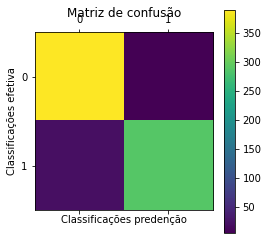

In [ ]:
#plotando os dados
plt.matshow(confusion_matrix)
plt.title("Matriz de confusão")
plt.colorbar()
plt.ylabel("Classificações efetiva")
plt.xlabel("Classificações predenção")
plt.show()

In [ ]:
docs_new = [
    'This is a question that is only beginning to be explored. The present collection makes a contribution to the investigations into the use of language in those situations which, informally and intuitively, we call ‘political’. Such an approach is revealing not only for politics itself but also for the human language capacity.'
]

X_new_tfidf_vectorize = vectorizer.transform(docs_new)

predicted = clf.predict(X_new_tfidf_vectorize)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'This is a question that is only beginning to be explored. The present collection makes a contribution to the investigations into the use of language in those situations which, informally and intuitively, we call ‘political’. Such an approach is revealing not only for politics itself but also for the human language capacity.' => talk.politics.misc
